reqs:
- python<3.12 aka 3.11
- bioio_bioformats
- requests
- instanseg-torch


In [5]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

loaded = tiff.imread('/home/phillip/documents/yen-lab-discussion/rfp/Lyz Fabp1/CDKO 158.1/Jej-4.tif')
image_path = "/home/phillip/documents/yen-lab-discussion/rfp/Lyz Fabp1/CDKO 158.1/Jej-4.nd2"

FileNotFoundError: [Errno 2] No such file or directory: '/home/phillip/documents/yen-lab-discussion/rfp/Lyz Fabp1/CDKO 158.1/Jej-4.tif'

In [ ]:
from instanseg import InstanSeg
instanseg_fluorescence = InstanSeg("fluorescence_nuclei_and_cells", image_reader= "bioformats", verbosity=1)

labeled_output = instanseg_fluorescence.eval(image = image_path,
                                            save_output = False,
                                            save_overlay = False,
                                            output_dir = "/home/phillip/documents/lysozyme/src/cell_detection/instasegOut",
                                            processing_method = "auto")

Model fluorescence_nuclei_and_cells version 0.1.0 already downloaded in /home/phillip/miniconda3/envs/instanseg/lib/python3.11/site-packages/instanseg/utils/../bioimageio_models/, loading
Requesting default device: cpu
21:13:19.663 [main] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.base/jdk.internal.loader.BuiltinClassLoader.loadClass(Unknown Source)
	at java.base/jdk.internal.loader.ClassLoaders$AppClassLoader.loadClass(Unknown Source)
	at java.base/java.lang.ClassLoader.loadClass(Unknown Source)
	at java.base/java.lang.Class.forName0(Native Method)
	at java.base/java.lang.Class.forName(Unknown Source)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:

/home/phillip/miniconda3/envs/instanseg/lib/python3.11/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/home/phillip/miniconda3/envs/instanseg/lib/python3.11/site-packages/torch/nn/modules/module.py:1784: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  return forward_call(*args, **kwargs)


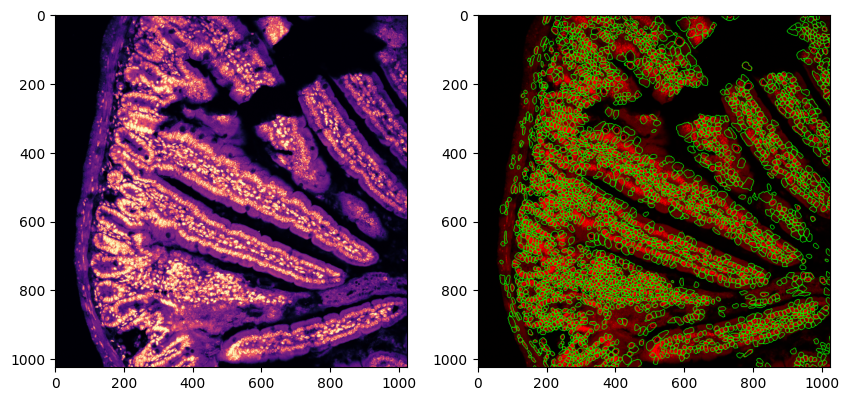

In [ ]:
import matplotlib.pyplot as plt
disp = instanseg_fluorescence.display(image = loaded[...,2], instances= labeled_output)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(loaded[...,2], cmap='magma')
ax[1].imshow(disp)



plt.imshow(disp)
plt.show()